# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [2]:
# Inspect the shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print(f"Pixel value range: {X_train.min():.1f} to {X_train.max():.1f}")
print("Number of classes:", len(class_names))

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

print(f"y_train_categorical shape: {y_train_categorical.shape}")
print(f"y_test_categorical shape: {y_test_categorical.shape}")

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)
Pixel value range: 0.0 to 1.0
Number of classes: 10
y_train_categorical shape: (60000, 10)
y_test_categorical shape: (10000, 10)


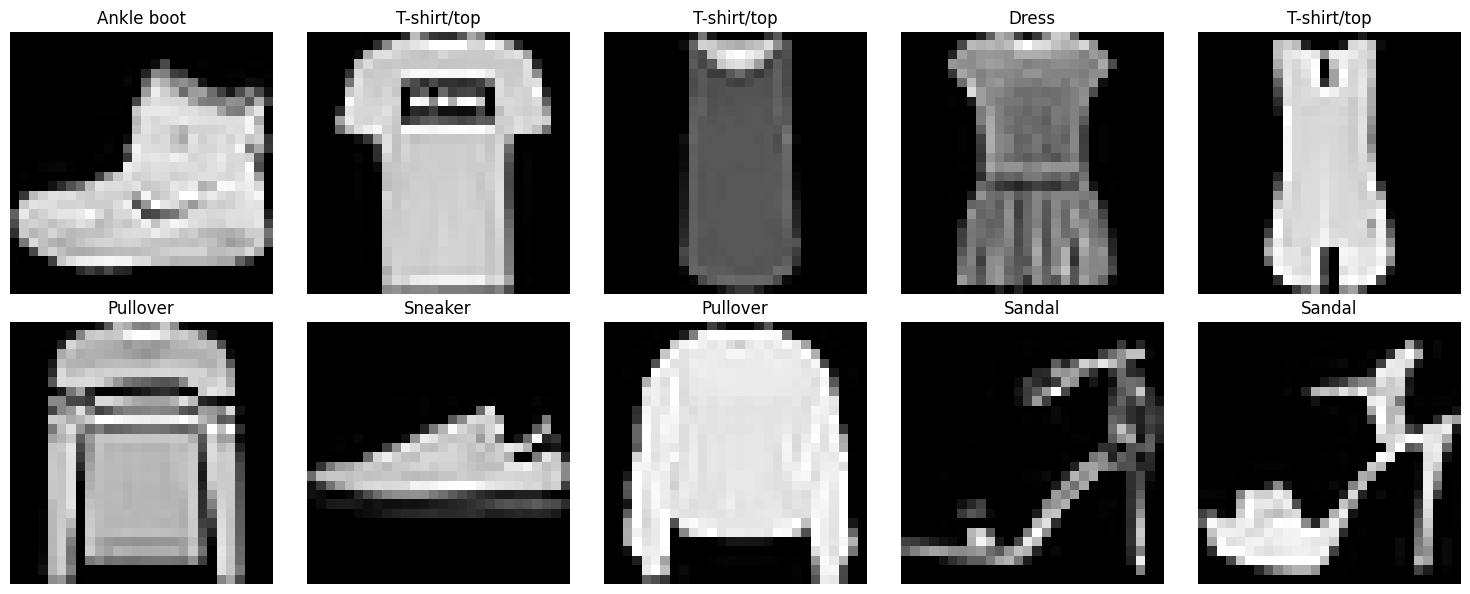

In [3]:
import matplotlib.pyplot as plt
# Verify the data looks as expected
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'{class_names[y_train[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**

The data looks as expected. It contains 60k training samples and 10k test samples, each of which is a 28x28 grayscale image of a clothing item. The images are on a black background, and fitted to the margin. The images are very low-quality, being both pixelated and grayscale. While all labels in the visualized examples "make sense", even a human eye wouldn't be able to confidently classify all of these images due to their poor quality.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.optimizers import Adam

# Create a simple linear regression model
model = Sequential()
# You can use `model.add(<layer>)` to add layers to the model
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10))
model.add(Softmax())

# Compile the model using `model.compile()`
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with `model.fit()`
history = model.fit(
    X_train,
    y_train_categorical,
    epochs=20,
    batch_size=128,
)

# Evaluate the model with `model.evaluate()`
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical)

print(f"Test loss: {test_loss:.2f}")
print(f"Test accuracy: {100*test_accuracy:.1f}%")

/Users/kiana/miniconda3/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step - accuracy: 0.6676 - loss: 1.0009
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.8269 - loss: 0.5259
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.8390 - loss: 0.4786
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.8447 - loss: 0.4575
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.8494 - loss: 0.4413
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.8526 - loss: 0.4298
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.8563 - loss: 0.4197
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.8578 - loss: 0.4163
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.8605 - loss: 0.4084
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.8626 - loss: 0.4026
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.8610 - loss: 0.4030
Epoch 12/20
469/469 ━━━━━━━━━━

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**

The baseline model got 84.2% test accuracy, which is good considering the simplicity of the model, but also unsurprising considering the simplicity of the dataset.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [5]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Train the model
history = model.fit(
    X_train,
    y_train_categorical,
    epochs=10,
    batch_size=128,
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical)

print(f"Test loss: {test_loss:.2f}")
print(f"Test accuracy: {100*test_accuracy:.1f}%")

Epoch 1/10


/Users/kiana/miniconda3/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.7889 - loss: 0.6317
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8877 - loss: 0.3174
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9043 - loss: 0.2613
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9177 - loss: 0.2283
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9287 - loss: 0.1983
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9385 - loss: 0.1726
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9447 - loss: 0.1571
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9533 - loss: 0.1333
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9570 - loss: 0.1218
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9631 - loss: 0.1060
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9054 - loss: 0.3036
Test loss: 0.29
Test accuracy: 90.8%


Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**

We got 90.8% test accuracy with two convolutional hidden layers in half the number of epochs. That's much better than the 84.2% accuracy of the linear baseline model. This is because convolutional layers are good at learning spatial features of images.

We also have a much bigger model, and there is now a bigger gap between the test accuracy and the training accuracy (96.3%), which means that the model is somewhat memorizing its training data.

# 4. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [6]:
from tensorflow.keras.layers import MaxPooling2D, Dropout

# Let's use 3 hidden layers and also max-pooling for better results

def create_model(num_filters, use_dropout):
    model = Sequential([
        Conv2D(num_filters, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(num_filters*2, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(num_filters*2, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu')
    ])
    
    if use_dropout:
        model.add(Dropout(0.3))
    
    model.add(Dense(10, activation='softmax'))
    
    return model

In [7]:
# A. Test Hyperparameters

results = []

for num_filters in [16, 32, 64]:
    model = create_model(num_filters=num_filters, use_dropout=False)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    history = model.fit(
        X_train,
        y_train_categorical,
        epochs=10,
        batch_size=128,
    )
    test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical)
    
    results.append((num_filters, test_loss, test_accuracy))

print("\nResults:")
for num_filters, test_loss, test_accuracy in results:
    print(f"Number of filters: {num_filters} -- Test loss: {test_loss:.2f} -- Test accuracy: {100*test_accuracy:.1f}%")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6488 - loss: 0.9803
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8400 - loss: 0.4413
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8686 - loss: 0.3665
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8800 - loss: 0.3342
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8926 - loss: 0.2998
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8962 - loss: 0.2872
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9021 - loss: 0.2652
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9070 - loss: 0.2564
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9084 - loss: 0.2478
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9108 - loss: 0.2408
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8993 - loss: 0.2890
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step 

In [8]:
# B. Test presence or absence of regularization

results = []

for use_dropout in [False, True]:
    model = create_model(num_filters=32, use_dropout=use_dropout)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    history = model.fit(
        X_train,
        y_train_categorical,
        epochs=10,
        batch_size=128,
    )
    test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical)
    
    results.append((use_dropout, test_loss, test_accuracy))

print("\nResults:")
for use_dropout, test_loss, test_accuracy in results:
    print(f"Using dropout: {use_dropout} -- Test loss: {test_loss:.2f} -- Test accuracy: {100*test_accuracy:.1f}%")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.6888 - loss: 0.8680
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8557 - loss: 0.3989
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8775 - loss: 0.3373
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8931 - loss: 0.2929
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9011 - loss: 0.2707
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9098 - loss: 0.2476
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9125 - loss: 0.2348
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9173 - loss: 0.2213
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9256 - loss: 0.2038
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9281 - loss: 0.1954
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8938 - loss: 0.2987
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**

Larger number of convolutional filters leads to better performance, however this also comes at the cost of training time and latency due to the increasing size of the model.

Dropout led to a slight increase in the model performance, presumably because it mitigates memorization.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [9]:
model = create_model(num_filters=64, use_dropout=True)
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
history = model.fit(
    X_train,
    y_train_categorical,
    epochs=10,
    batch_size=128,
)
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical)

print(f"Test loss: {test_loss:.2f}")
print(f"Test accuracy: {100*test_accuracy:.1f}%")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.6609 - loss: 0.9498
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.8521 - loss: 0.4172
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.8798 - loss: 0.3378
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.8922 - loss: 0.3029
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9022 - loss: 0.2731
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.9102 - loss: 0.2522
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.9172 - loss: 0.2311
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.9224 - loss: 0.2169
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.9311 - loss: 0.1914
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.9360 - loss: 0.1788
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9169 - loss: 0.2486
Test loss: 0.24
Test accuracy: 91.8%


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**

The final model got 91.8% test accuracy, which is the best I got. It is slightly better than the 90.8% of the simple CNN model with fewer layers and no maxpooling. It is much better than the 84.2% of the linear baseline model. We are in the territory of diminishing returns. The dataset is very small and low-quality, so the improvements beyond the simple CNN are mostly an overkill considering their latency cost.

If I had more time, I could test more hyperparameters:
- Number of layers
- Size of the convolutional filters
- With or without max-pooling
- Dropout rate
- Number of epochs
- Learning rate

I bet we could increase the test accuracy another percentage point with more overkill.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.